In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

df=pd.read_csv("Algerian_forest_fires_cleaned_dataset.csv")
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [3]:

df.drop(["month","day","year"],axis=1,inplace=True)
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [4]:
df["Classes"].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [5]:
# encoding
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("Algerian_forest_fires_cleaned_dataset.csv")
df.head()
df.drop(["month","day","year"],axis=1,inplace=True)
df
df["Classes"]=np.where(df["Classes"].str.contains("not fire"),0,1)



In [6]:
df["Classes"].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [7]:
# inde and dep featueres
x=df.drop('FWI',axis=1)
y=df["FWI"]

In [8]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5,random_state=42)


In [9]:
X_train.shape

(121, 11)

In [10]:
y_train.shape

(121,)

In [11]:
# feature seleection based on corredlation
X_train.corr()
# -vely corr imp//// try to remove highly +vely corr features

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
Temperature,1.000000,-0.629548,-0.275032,-0.334468,0.692928,0.526955,0.408943,0.610875,0.497731,0.546105,0.235690
RH,-0.629548,1.000000,0.218804,0.238679,-0.633760,-0.401741,-0.210469,-0.713804,-0.342890,-0.449932,-0.400363
Ws,-0.275032,0.218804,1.000000,0.276468,-0.159436,-0.003823,0.074557,-0.029568,0.028324,-0.100804,-0.189989
Rain,-0.334468,0.238679,0.276468,1.000000,-0.553689,-0.290332,-0.306338,-0.354670,-0.300936,-0.410625,-0.072397
FFMC,0.692928,-0.633760,-0.159436,-0.553689,1.000000,0.618557,0.523767,0.740955,0.602701,0.788668,0.221144
DMC,0.526955,-0.401741,-0.003823,-0.290332,0.618557,1.000000,0.883339,0.662162,0.984718,0.623561,0.177626
DC,0.408943,-0.210469,0.074557,-0.306338,0.523767,0.883339,1.000000,0.480589,0.949195,0.572174,-0.076725
ISI,0.610875,-0.713804,-0.029568,-0.354670,0.740955,0.662162,0.480589,1.000000,0.614249,0.724488,0.269873
BUI,0.497731,-0.342890,0.028324,-0.300936,0.602701,0.984718,0.949195,0.614249,1.000000,0.623985,0.083489
Classes,0.546105,-0.449932,-0.100804,-0.410625,0.788668,0.623561,0.572174,0.724488,0.623985,1.000000,0.155307


<Axes: >

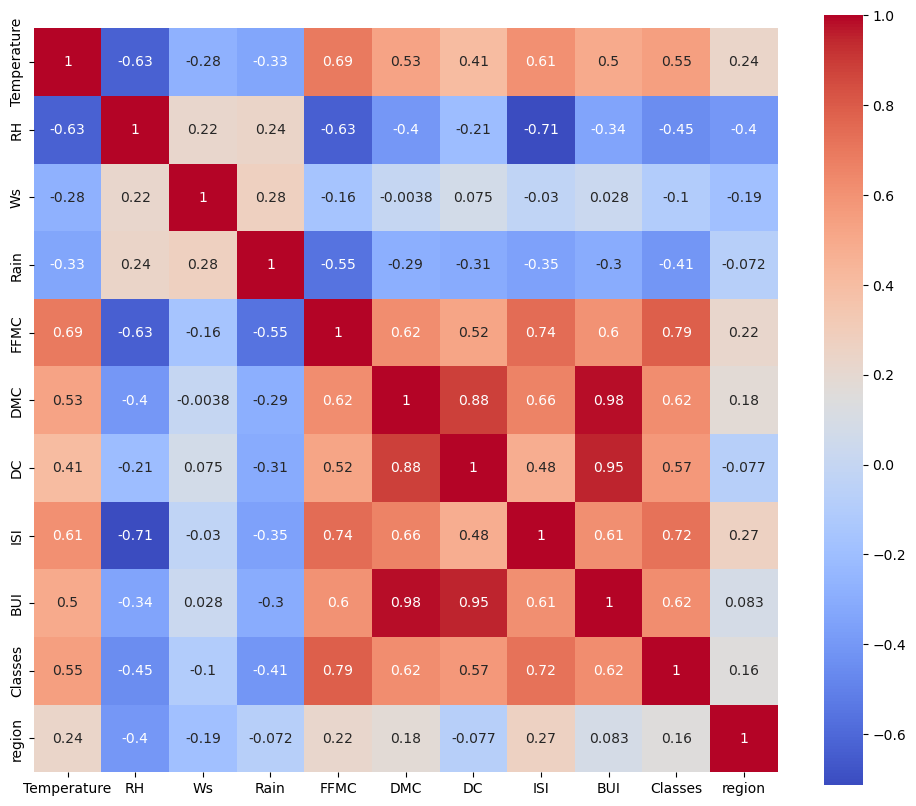

In [12]:
# check for multicollinearty
# indep features must not be so much corr
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True)

In [13]:
# lets remove some features,based on highly correlated values
# we will remove the feature with the highest correlation with the target variable(threshold)
def correlation(dataset,threshold):
    col_corr=set() #uniquely
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [14]:
# threshold is setup by domain expertise
corr_features=correlation(X_train,0.85)
corr_features

{'BUI', 'DC'}

In [15]:
# dropping features with corr>0.85
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)


In [16]:
X_train

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,region
36,35,64,18,0.2,80.0,9.7,2.8,0,0
142,32,55,14,0.0,86.2,8.3,5.0,1,1
61,36,45,14,0.0,78.8,4.8,2.0,0,0
22,32,62,18,0.1,81.4,8.2,3.3,1,0
118,31,66,11,0.0,85.7,8.3,4.0,1,0
...,...,...,...,...,...,...,...,...,...
106,24,82,15,0.4,44.9,0.9,0.2,0,0
14,28,80,17,3.1,49.4,3.0,0.4,0,0
92,25,76,17,7.2,46.0,1.3,0.2,0,0
179,34,59,16,0.0,88.1,19.5,7.4,1,1


feature scaling or standardization

In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
X_train_scaled

array([[ 0.85337191,  0.03263708,  0.93160102, ..., -0.43837123,
        -1.11388543, -1.02510851],
       [ 0.0424452 , -0.56976592, -0.6072894 , ...,  0.0786621 ,
         0.8977584 ,  0.97550649],
       [ 1.12368082, -1.23910258, -0.6072894 , ..., -0.62638335,
        -1.11388543, -1.02510851],
       ...,
       [-1.84971713,  0.83584107,  0.54687842, ..., -1.04941062,
        -1.11388543, -1.02510851],
       [ 0.58306301, -0.30203125,  0.16215581, ...,  0.64269845,
         0.8977584 ,  0.97550649],
       [-0.49817261,  0.90277473,  2.08576884, ..., -0.83789698,
        -1.11388543, -1.02510851]])

boxplot to understand effect of standard scaler

Text(0.5, 1.0, 'X_train after scaling')

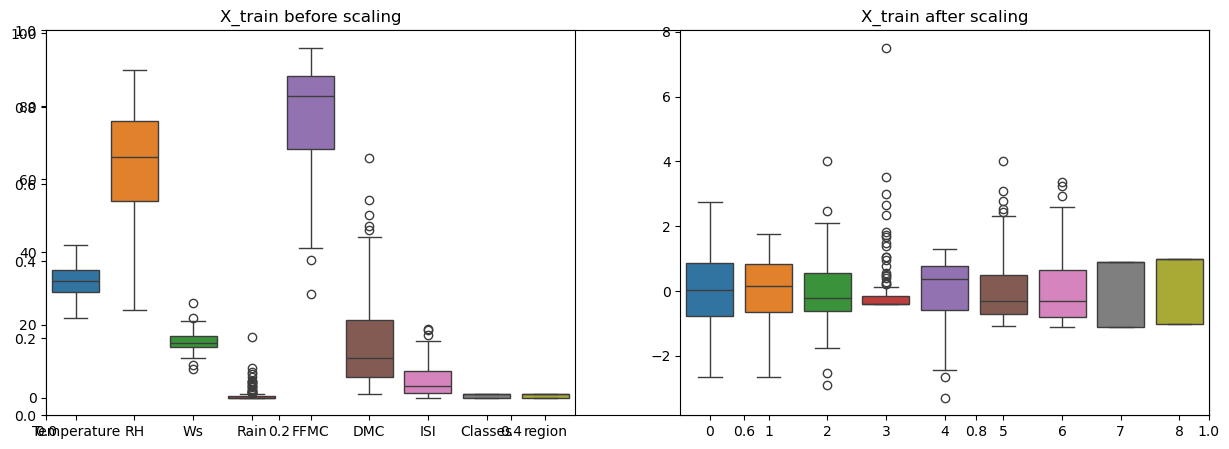

In [18]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X_train before scaling")

plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train after scaling")
# almost all are in same scale

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
regression=LinearRegression()
regression.fit(X_train_scaled,y_train)
y_pred=regression.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(f"mean absolute error={mae}")
print(f"r2 score={score}")

mean absolute error=0.7774717721106075
r2 score=0.9790018503222561


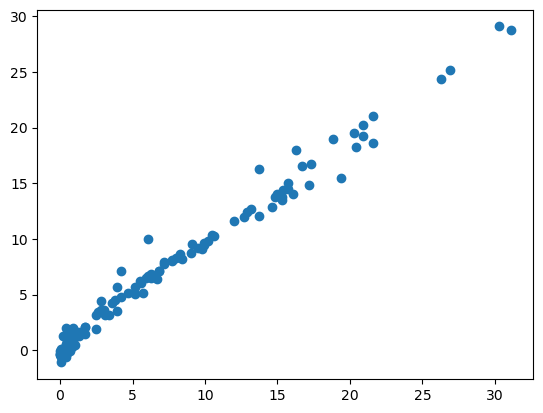

In [20]:
plt.scatter(y_test,y_pred)

applying laso regression

mean absolute error=1.3821216601718067
r2 score=0.9367647662921699


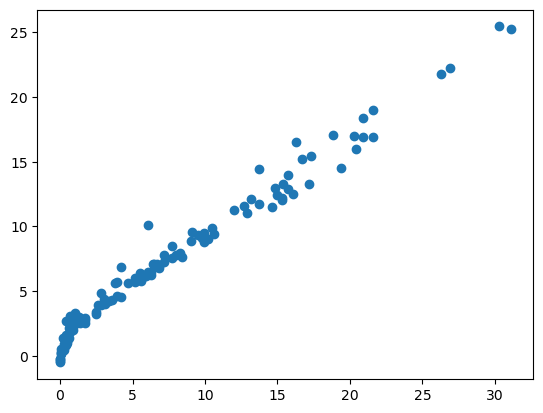

In [21]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(f"mean absolute error={mae}")
print(f"r2 score={score}")
plt.scatter(y_test,y_pred)

ridge regression

mean absolute error=0.8036035637139434
r2 score=0.9779657503411713


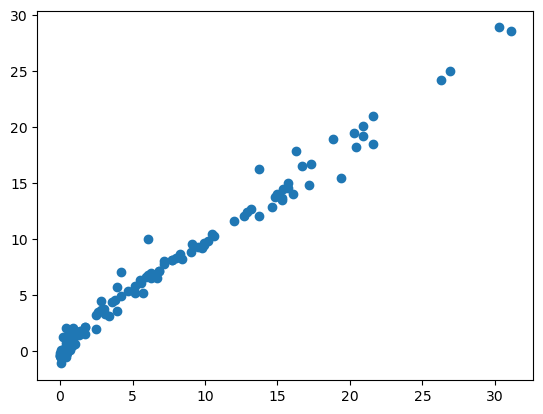

In [22]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(f"mean absolute error={mae}")
print(f"r2 score={score}")
plt.scatter(y_test,y_pred)

elastic net

mean absolute error=2.060872497007123
r2 score=0.8675450504038686


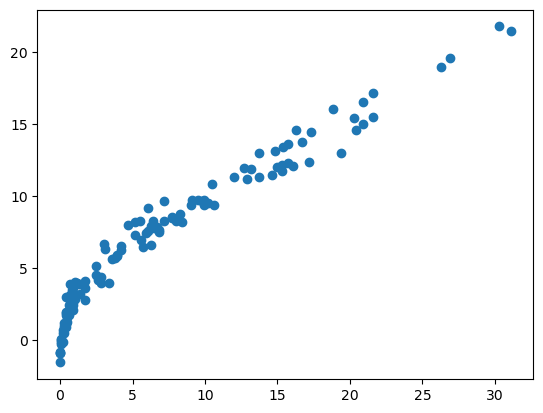

In [23]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elasticNet=ElasticNet()
elasticNet.fit(X_train_scaled,y_train)
y_pred=elasticNet.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(f"mean absolute error={mae}")
print(f"r2 score={score}")
plt.scatter(y_test,y_pred)

In [25]:
from sklearn.linear_model import LassoCV
lasso=LassoCV(cv=5)
lasso.fit(X_train_scaled,y_train)


LassoCV(cv=5)

In [28]:
lasso.alpha_
lasso.alphas_

array([6.70751309, 6.25544916, 5.83385282, 5.44067066, 5.07398767,
       4.73201788, 4.41309572, 4.11566784, 3.8382856 , 3.57959799,
       3.33834507, 3.11335179, 2.9035223 , 2.70783461, 2.52533562,
       2.35513645, 2.19640814, 2.04837758, 1.91032379, 1.78157436,
       1.66150221, 1.54952252, 1.44508989, 1.34769567, 1.25686549,
       1.17215696, 1.09315751, 1.01948235, 0.95077265, 0.88669376,
       0.82693356, 0.77120101, 0.71922464, 0.67075131, 0.62554492,
       0.58338528, 0.54406707, 0.50739877, 0.47320179, 0.44130957,
       0.41156678, 0.38382856, 0.3579598 , 0.33383451, 0.31133518,
       0.29035223, 0.27078346, 0.25253356, 0.23551365, 0.21964081,
       0.20483776, 0.19103238, 0.17815744, 0.16615022, 0.15495225,
       0.14450899, 0.13476957, 0.12568655, 0.1172157 , 0.10931575,
       0.10194823, 0.09507727, 0.08866938, 0.08269336, 0.0771201 ,
       0.07192246, 0.06707513, 0.06255449, 0.05833853, 0.05440671,
       0.05073988, 0.04732018, 0.04413096, 0.04115668, 0.03838

mean absolute error=0.934814105413612
r2 score=0.9715447684120192


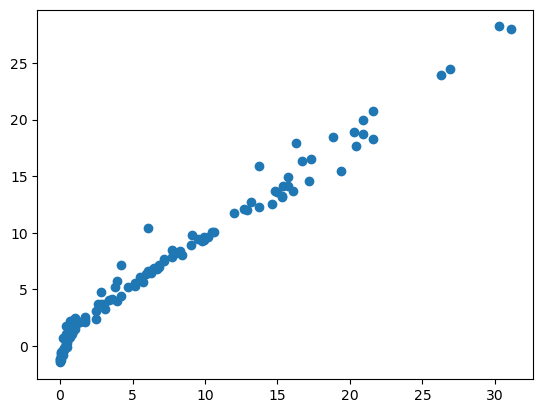

In [29]:

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(f"mean absolute error={mae}")
print(f"r2 score={score}")
plt.scatter(y_test,y_pred)

mean absolute error=0.8036035637139434
r2 score=0.9779657503411713


ValueError: x and y must be the same size

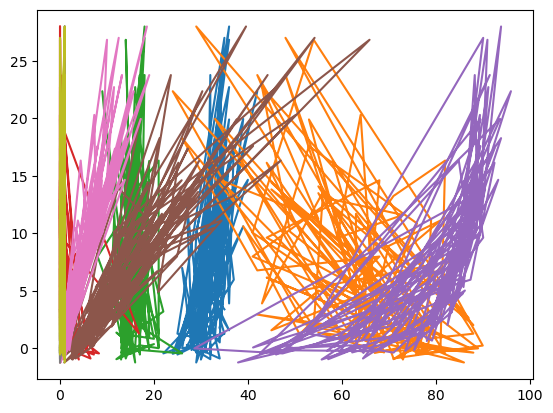

In [40]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)



y_pred=ridgecv.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(f"mean absolute error={mae}")
print(f"r2 score={score}")
plt.plot(X_train_scaled,ridgecv.predict(X_train_scaled))
plt.scatter(y_test,y_pred)

In [32]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_values': False}